# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

1. the larger the mouse the larger the tumor volume, so mouse weight has a positive correlation with tumor volume.  
2.  capomulin caused the largest decrease in tumor volume even with it having the most subjects tested. 
3.infubinol managed to leave the largest tumor volumes, with one large outlier that only mangaged to reach the medians of the most effective drug regimens. 

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_DF= pd.merge(mouse_metadata, study_results,on='Mouse ID', how="outer")

# Display the data table for preview
mouse_study_DF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice.
Mouse_num = mouse_study_DF['Mouse ID'].unique()
len(Mouse_num)

249

In [100]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicateDF = mouse_study_DF.loc[mouse_study_DF.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicateDF

array(['g989'], dtype=object)

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_DF[mouse_study_DF['Mouse ID'].isin(duplicateDF)== False]
mouse_study_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [103]:
# Checking the number of mice in the clean DataFrame.
Mouse_num_clean = mouse_study_clean['Mouse ID'].unique()
len(Mouse_num_clean)

248

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

T_mean = mouse_study_clean.groupby('Drug Regimen' ) ['Tumor Volume (mm3)'].mean()
T_median = mouse_study_clean.groupby('Drug Regimen' ) ['Tumor Volume (mm3)'].median()
T_var =mouse_study_clean.groupby('Drug Regimen' ) ['Tumor Volume (mm3)'].var()
T_std = mouse_study_clean.groupby('Drug Regimen' ) ['Tumor Volume (mm3)'].std()
T_sem =mouse_study_clean.groupby('Drug Regimen' ) ['Tumor Volume (mm3)'].sem()
mouse_summary =mouse_study_clean.groupby('Drug Regimen' )
mouse_DF= pd.DataFrame ({'mean': T_mean
                          , 'median':T_median, 'var':T_var, 'std':T_std, 'sem':T_sem     
})
mouse_DF.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [105]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

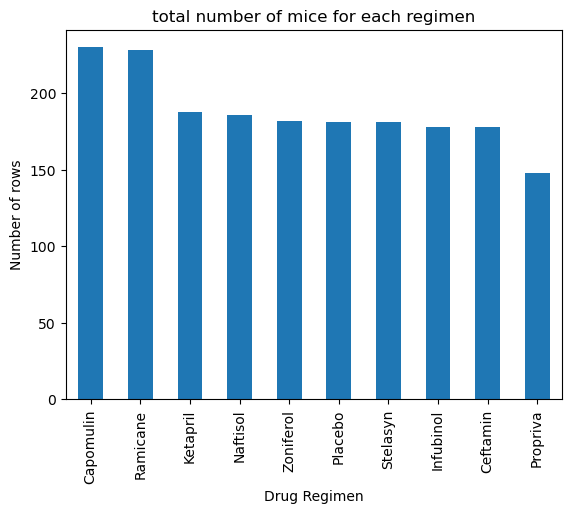

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
chartable_mouse_study = mouse_study_clean['Drug Regimen'].value_counts()
chartable_mouse_study
    
mouse_chart = chartable_mouse_study.plot(kind="bar", title="total number of mice for each regimen")
mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Number of rows")
# chartable_mouse_study.head()
plt.show

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

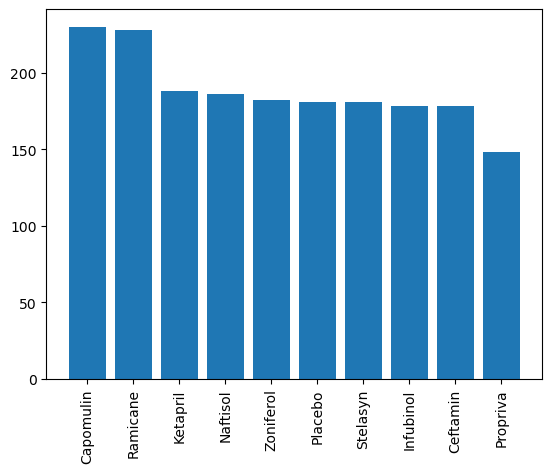

In [107]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
chartable_mouse_study2 = mouse_study_clean['Drug Regimen'].value_counts()
chartable_mouse_study2 = mouse_study_clean['Drug Regimen'].value_counts()
mouse_chart2 = plt.bar(chartable_mouse_study2.index, chartable_mouse_study2.values, align = 'center')
plt.xticks(rotation = 90)

# mouse_chart2.set_xlabel("Drug Regimen")
# mouse_chart2.set_ylabel("Number of rows")


<Axes: ylabel='Sex'>

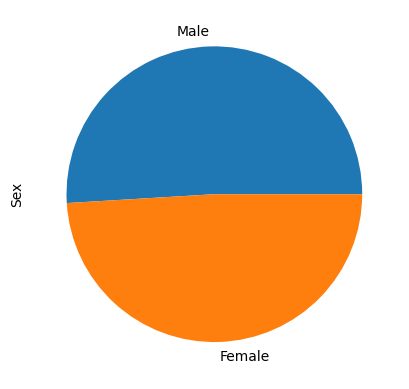

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = mouse_study_clean['Sex']
sizes = labels.value_counts()
sizes.plot(kind = 'pie')

<function matplotlib.pyplot.show(close=None, block=None)>

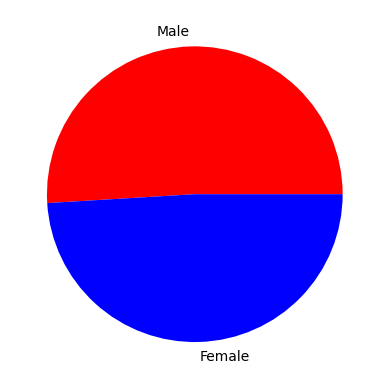

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_study_clean['Sex']
sizes = labels.value_counts()
colors = [ 'red','blue']
plt.pie(sizes.values,labels= labels.unique(),colors=colors)
plt.show

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ID = mouse_study_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_ID = ID.merge(mouse_study_clean, on=['Mouse ID', 'Timepoint'], how= 'left')

merged_ID

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [112]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_tumor_vol = merged_ID.loc[merged_ID['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol.append(max_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = max_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = max_tumor_vol.loc[(max_tumor_vol < lower_bound) | (max_tumor_vol > upper_bound)] 
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


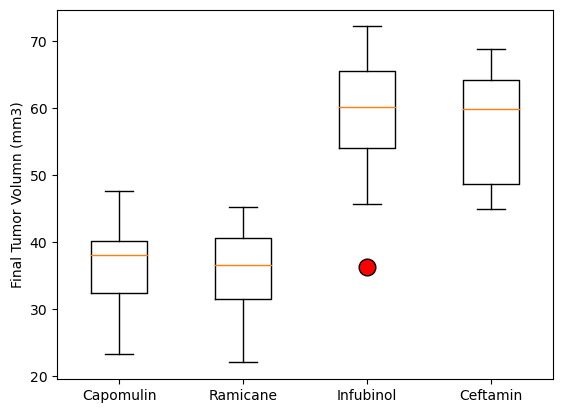

In [114]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Defining outlier characteristics
red_out = dict(markerfacecolor = 'red', markersize = 12)

#Generate plopt
plt.figure()
plt.boxplot(tumor_vol, 
            labels = treatments,
            flierprops = red_out)
plt.ylabel('Final Tumor Volumn (mm3)')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

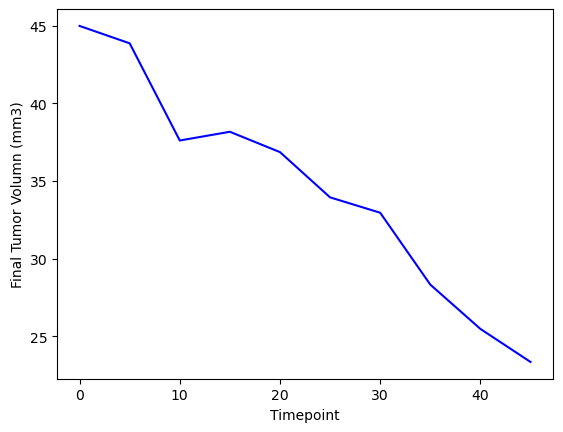

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = 's185'
tumor_vol_2 = mouse_study_clean.loc[mouse_study_clean['Mouse ID'] == mouse, 'Tumor Volume (mm3)']
timepoint = mouse_study_clean.loc[mouse_study_clean['Mouse ID'] == mouse, 'Timepoint']
plt.plot(timepoint, tumor_vol_2, color="blue", label="tumor")
plt.xlabel('Timepoint')
plt.ylabel('Final Tumor Volumn (mm3)')
plt.show

Text(0, 0.5, 'Weight')

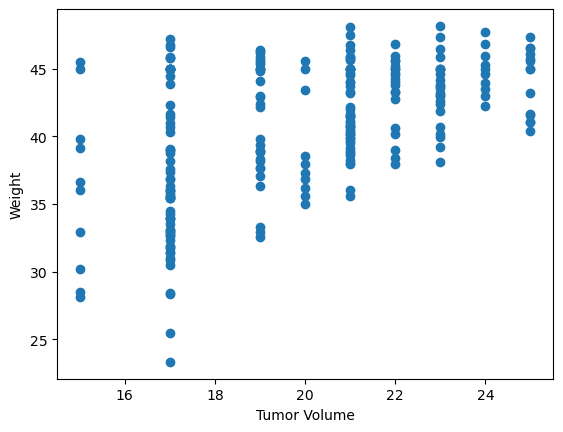

In [116]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

tumor_vol_3 = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
weight = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin', 'Weight (g)']
scatter = plt.scatter(weight, tumor_vol_3)
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")



## Correlation and Regression

{0.53}
0.9609669432428346
21.489827213299584
0.5256995552077166
9.605446629502282e-18
0.10298279892023657


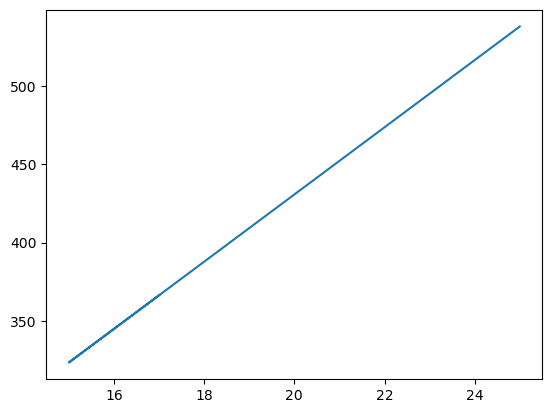

In [117]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = {round(st.pearsonr(weight, tumor_vol_3)[0],2)}
slope, intercept, r_value, p_value, std_err = st.linregress(weight, tumor_vol_3)
plt.plot(weight, intercept * weight + slope, label= 'fitted line')
#print linear regression model variables 
print(correlation_coefficient)
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)
plt.show(scatter)